# NGC 346 stellar velocities from He II 5041.5 Å absorption line

Castro+ (2018) used this line for Tarantula stars.  It has the advantage that it is strong absorption in O stars and there is no nebular contamination.

In [66]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube
import regions
import sys
sys.path.append("../lib")
import moments
import extract
import masktools

sns.set_context("talk")
sns.set_color_codes()

In [2]:
cube = Cube("../big-data/ngc346-5300-6100-cube-contsub.fits")
cont = Cube("../big-data/ngc346-5300-6100-cube-cont.fits")

In [3]:
win5411 = cube.select_lambda(5400, 5430)

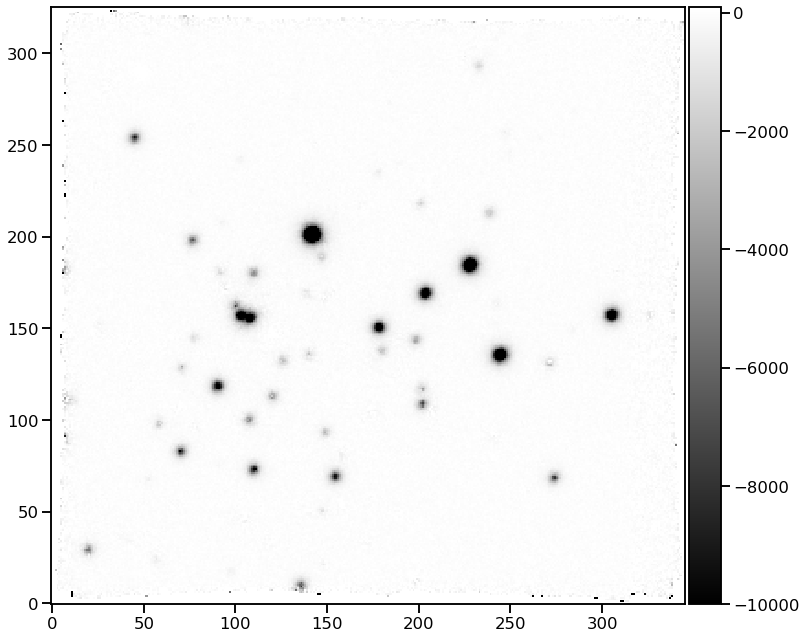

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
win5411.sum(axis=0).plot(
    vmin=-10000, 
    vmax=100, 
    cmap="gray",
    colorbar="v"
);

In [5]:
mom5411 = moments.find_moments(win5411)

../lib/moments.py:41: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [70]:
cont5411 = cont.select_lambda(5400, 5430).mean(axis=0)
dlam, _, _ = cube.get_step()
ew5411 = -dlam * mom5411[0] / cont5411

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


Mask out region where there are no stars

In [71]:
masktools.trim_edges(ew5411, 10)
masktools.trim_edges(cont5411, 10)
ew5411.mask = ew5411.mask | (cont5411.data < 3000)

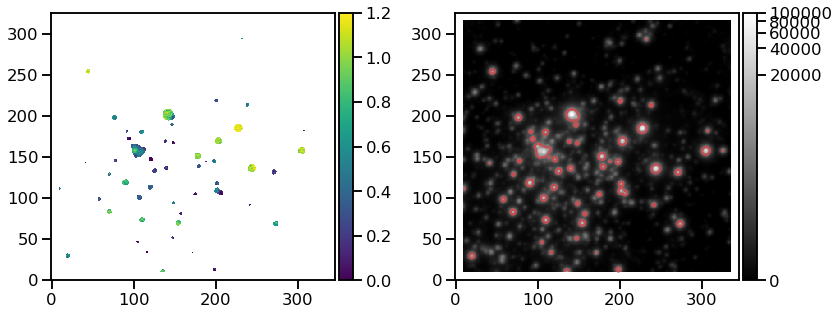

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ew5411.plot(
    ax=axes[0],
    vmin=0, 
    vmax=1.2, 
    cmap="viridis",
    colorbar="v"
)
cont5411.plot(
    ax=axes[1],
    vmin=0, 
    vmax=1e5, 
    cmap="gray",
    scale="log",
    colorbar="v"
)
axes[1].contour(cont5411.data, levels=[3000], colors="r")
fig.tight_layout();

In [73]:
wav0 = 5411.52 # from Atomic Line List
vel = 3e5 * (mom5411[1] - wav0) / wav0
vel.mask = vel.mask | (cont5411.data < 3000) | (ew5411.data < 0.2)
masktools.trim_edges(vel, 10)

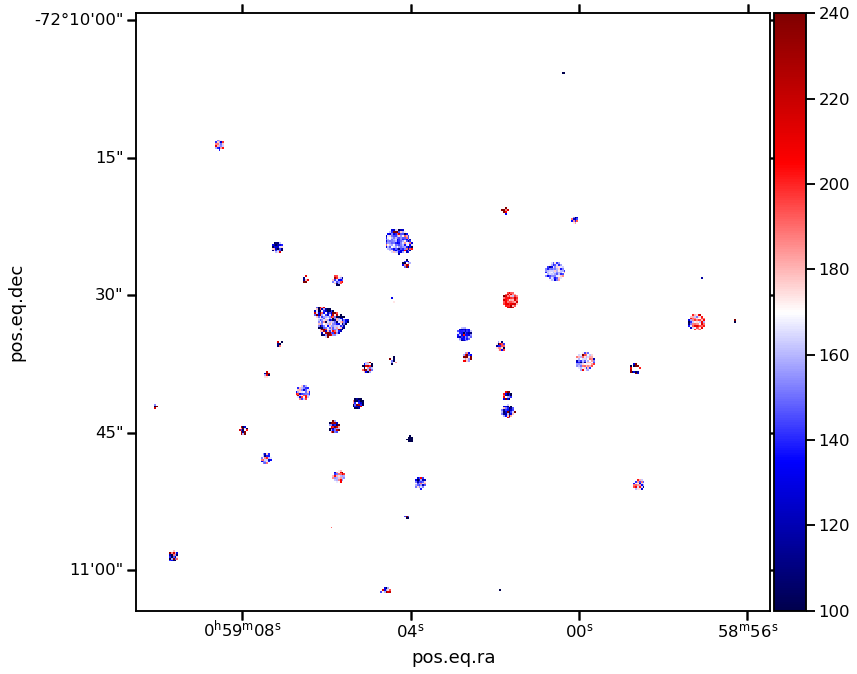

In [99]:
fig, ax = plt.subplots(figsize=(12, 12))
vel.rebin(1).plot(
    vmin=100, 
    vmax=240, 
    cmap="seismic",
    colorbar="v",
    use_wcs=True,
);
ax.contour(cont5411.data, levels=[3000], colors="g");

In [127]:
seg = cont5411.segment(minsize=4, background=5000)

In [128]:
bseg = [_ for _ in seg if _.data.max() > 10000]

len(bseg)

20

In [104]:
from astropy.wcs import WCS

[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING] use_wcs does not work when giving also an axis (ax)
[WARNING

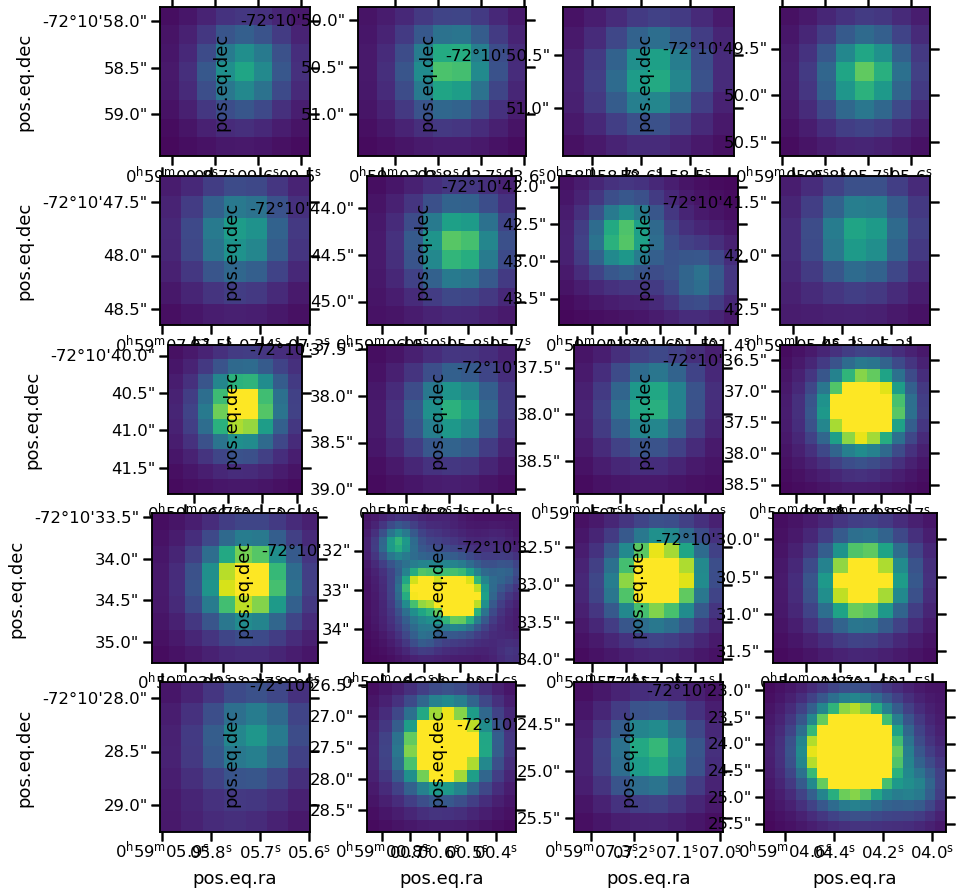

In [129]:
ny, nx = 5, 4 
fig = plt.figure(figsize=(12, 12))
for i, subim in enumerate(bseg):
    w = WCS(subim.get_data_hdu().header).celestial
    ax = fig.add_subplot(ny, nx, i + 1, projection=w)
    subim.plot(ax=ax, vmin=0, vmax=20000, use_wcs=True)
fig.tight_layout()

In [132]:
import pandas as pd

In [134]:
df = pd.DataFrame([_.peak() for _ in bseg])
df

,x,y,p,q,data
0,14.790135,-72.182924,4.096403,3.972197,11789.590937
1,14.765714,-72.180703,4.116548,4.472341,14349.041211
2,14.744079,-72.180744,3.350211,3.642448,12162.935703
3,14.773775,-72.180494,3.874770,4.071909,15089.314883
4,14.780975,-72.179955,3.563984,3.405365,11016.535898
5,14.774252,-72.178998,3.789407,4.437002,14770.353594
6,14.757091,-72.178527,5.272110,3.973558,14645.354805
7,14.771884,-72.178287,3.599484,3.482893,11662.034258
8,14.777353,-72.177978,5.157259,4.351597,22872.166172
9,14.744535,-72.177266,3.965400,4.149961,12866.090664


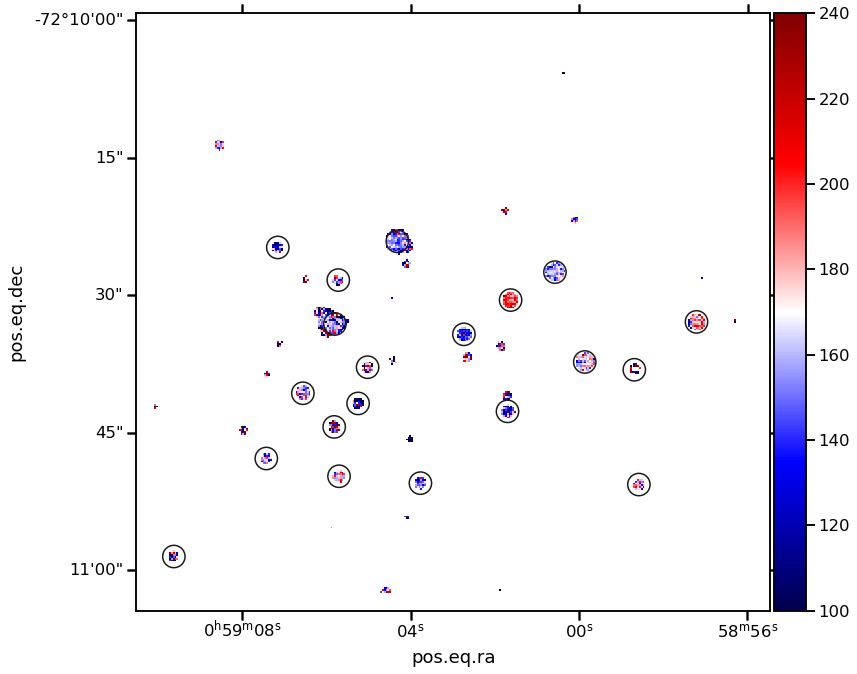

In [161]:
fig = plt.figure(figsize=(12, 12))
ax = ax = fig.add_subplot(
    1, 1, 1, 
    projection=vel.wcs.wcs,
)
vel.rebin(1).plot(
    ax=ax,
    vmin=100, 
    vmax=240, 
    cmap="seismic",
    colorbar="v",
)
ax.scatter(
    "x", "y", 
    data=df, 
    marker="o", color="k", s=500, facecolor="none",
    transform=ax.get_transform("icrs"),
);

In [141]:
source = bseg[0]

In [143]:
source.get_range()

array([-72.18315192,  14.78958504, -72.18276286,  14.79085657])

In [156]:
x, y = df["x"][10], df["y"][10]
vel.wcs.sky

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 14.76375  -72.17556  
CRPIX : 166.2909161268  162.68515868383  
CD1_1 CD1_2  : -5.5555555555556e-05  0.0  
CD2_1 CD2_2  : 0.0  5.5555555555556e-05  
NAXIS : 346  326

In [155]:
x, y

(14.770945383668618, -72.17718907925584)

In [160]:
type(vel.wcs.wcs)

astropy.wcs.wcs.WCS

In [172]:
vel.wcs.wcs.world_to_pixel_values(x, y)

(array(125.64911363), array(132.35936236))